# Red-Sequence Color Index
This notebook illustrates the color index measurements of the red sequence galaxies. We use the redMaPPer cosmoDC2 catalog extracted from <a href='https://github.com/LSSTDESC/gcr-catalogs'> Generic Catalog Reader (GCR)</a>.


## Loading Python Packages

In [15]:
import glob,os
import numpy as np
import pandas as pd

import GCRCatalogs as gcr
from astropy.table import Table

import matplotlib.pyplot as plt
plt.style.use('presentation.mplstyle')

path = '/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/'

## Loading cosmoDC2 redMaPPer Catalog
The catalog has a total of 51 properties, 30 are cluster quantities and 21 are member quantities.

In [16]:
redmapper = gcr.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.7.5')

In [17]:
quantities = np.sort(redmapper.list_all_quantities())
print('Total number of quantities: ',len(quantities),'\n')

# Cluster quantities
cl_quantities = [q for q in quantities if 'member' not in q]
print('Number of cluster quantities: ',len(cl_quantities),'\n')

# Member quantities
me_quantities = [q for q in quantities if 'member' in q]
print('Number of member quantities: ',len(me_quantities))

Total number of quantities:  51 

Number of cluster quantities:  30 

Number of member quantities:  21


Scatter distribution of cluster members of a cluster with `cluster_id=1`.

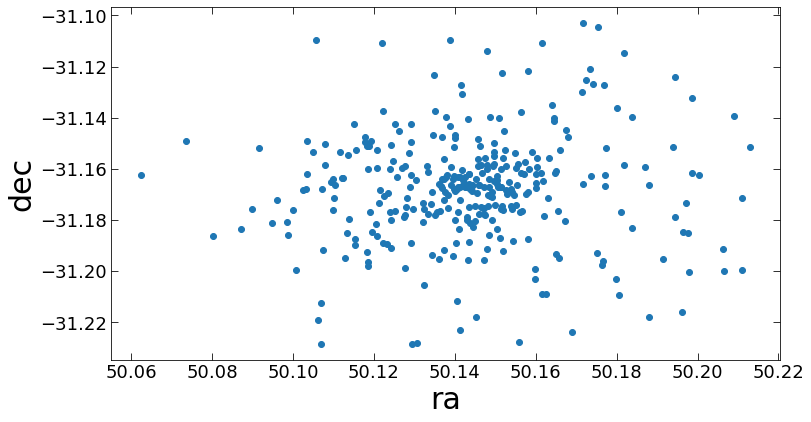

In [18]:
cl_members0 = Table(redmapper.get_quantities(['cluster_id_member','ra_member','dec_member','mag_g_lsst_member', 
                                              'mag_i_lsst_member', 'mag_r_lsst_member', 'p_member'], 
                                             filters=[ f'redshift_true_member > 0.2',f'redshift_true_member < 1',
                                                      f'cluster_id_member==1']))
plt.scatter(cl_members0['ra_member'], cl_members0['dec_member']) # cluster_id_member==1
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

## Plotting the Color Index

In [19]:
zmin = 0.25
zmax = 0.26

cl_members1 = Table(redmapper.get_quantities(['cluster_id_member','ra_member','dec_member','mag_z_lsst_member',
                                              'mag_g_lsst_member', 'mag_i_lsst_member', 'mag_r_lsst_member', 'p_member'],
                                             filters=[ f'redshift_true_member > {zmin}',f'redshift_true_member < {zmax}', 
                                                      f'p_member>0.9']))

We filter the galaxy members with the property `p_member > 0.9` as they form a tight red sequence and contribute to most of the richness of a cluster.

-0.003027919050954944 1.3567100320815249


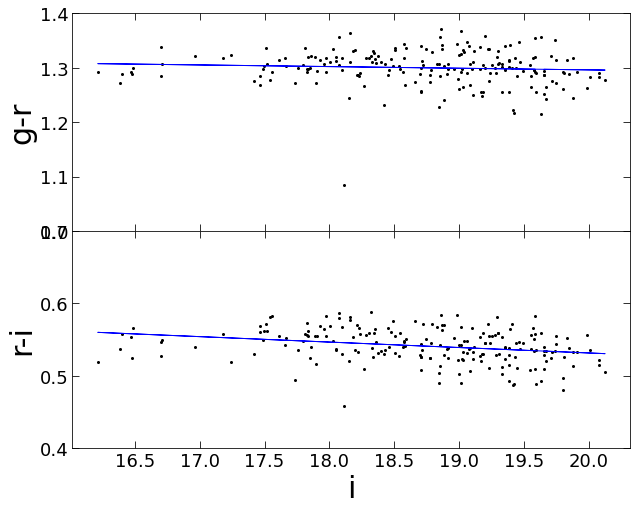

In [20]:
## Color-index <0.5 is blue(hot) ; >1.5 is red(cold) galaxy colour magnitude diagram
x = cl_members1['mag_i_lsst_member']
y0 = cl_members1['mag_g_lsst_member']-cl_members1['mag_r_lsst_member']
y1 = cl_members1['mag_r_lsst_member']-cl_members1['mag_i_lsst_member']

#find line of best fit
a0, b0 = np.polyfit(x, y0, 1)
print(a0,b0)
a1, b1 = np.polyfit(x, y1, 1)

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].scatter(x,y0, c='k', s=4)
axs[0].plot(x, a0*x+b0, color='blue', linewidth=1)
axs[0].set_yticks(np.arange(1, 1.5, 0.1)) 
axs[0].set_ylabel('g-r')

axs[1].scatter(x,y1, c='k', s=4)
axs[1].plot(x, a1*x+b1, color='blue', linewidth=1)
axs[1].set_yticks(np.arange(0.4, 0.8, 0.1)) 
axs[1].set_ylabel('r-i')
axs[1].set_xlabel('i')

plt.show()

The scatter plot shows red-sequence at $0.25 < z < 0.26$ for the color selected galaxies with $\mathrm{p_member}>0.9$. We also show the linear model (blue line), which is a good representation of the red sequence in both g − r and r − i.

In [21]:
cl_members2 = Table(redmapper.get_quantities(['cluster_id_member','ra_member','dec_member','mag_z_lsst_member',
                                              'mag_g_lsst_member', 'mag_i_lsst_member', 'mag_r_lsst_member', 
                                              'redshift_true_member','p_member'], 
                                             filters=[ f'redshift_true_member > 0.2',
                                                      f'redshift_true_member < 1',  f'p_member>0.9']))
redshift_bin = np.linspace(0.2,1,17)
labels = np.round(np.arange(0.2, 1, 0.1/2),2).tolist()

In [22]:
cl_members2['g_r'] = cl_members2['mag_g_lsst_member'] - cl_members2['mag_r_lsst_member']
cl_members2['r_i'] = cl_members2['mag_r_lsst_member'] - cl_members2['mag_i_lsst_member']
cl_members2['i_z'] = cl_members2['mag_i_lsst_member'] - cl_members2['mag_z_lsst_member']
cl_members2['redshift'] = pd.cut(cl_members2['redshift_true_member'], bins=redshift_bin, labels=labels, include_lowest=True)

In [23]:
cl_members2[:5]

cluster_id_member,dec_member,redshift_true_member,mag_i_lsst_member,ra_member,mag_r_lsst_member,p_member,mag_g_lsst_member,mag_z_lsst_member,g_r,r_i,i_z,redshift
int32,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64
12,-25.717996124671657,0.51072353,17.89911,52.520436430812914,18.798338,0.9890002,20.286411,17.505138,1.4880733,0.89922714,0.3939724,0.5
12,-25.71783277825776,0.5130878,18.05471,52.519490104517175,18.879597,0.9636454,20.368668,17.676914,1.4890709,0.8248863,0.37779617,0.5
12,-25.71690396971558,0.51073974,21.0543,52.518979242173025,21.914343,0.98902035,23.4083,20.635675,1.4939575,0.8600426,0.41862488,0.5
12,-25.71709733763848,0.5105011,20.303442,52.52323890490535,21.228529,0.99228126,22.737461,19.94585,1.5089321,0.925087,0.35759163,0.5
12,-25.717318002826303,0.51873726,19.791677,52.51752041591883,20.697811,0.978338,22.236683,19.392906,1.5388718,0.90613365,0.3987713,0.5


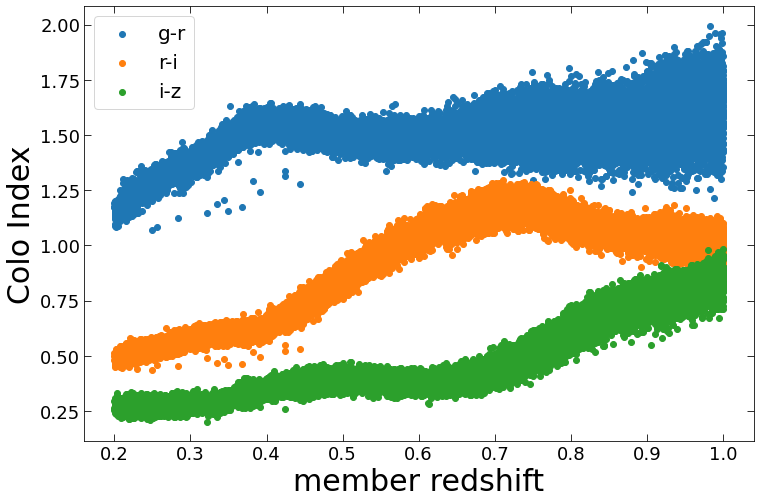

In [24]:
plt.figure(figsize=(12,8))
X = cl_members2['redshift_true_member']
plt.scatter(X,cl_members2['g_r'], label='g-r')
plt.scatter(X,cl_members2['r_i'], label='r-i')
plt.scatter(X,cl_members2['i_z'], label='i-z')
plt.xlabel('member redshift')
plt.ylabel('Colo Index')
plt.legend()
plt.show()

The plot shows a scatter plot of the colour of the redMaPPer member galaxies in cosmoDC2 redMaPPer catalog.

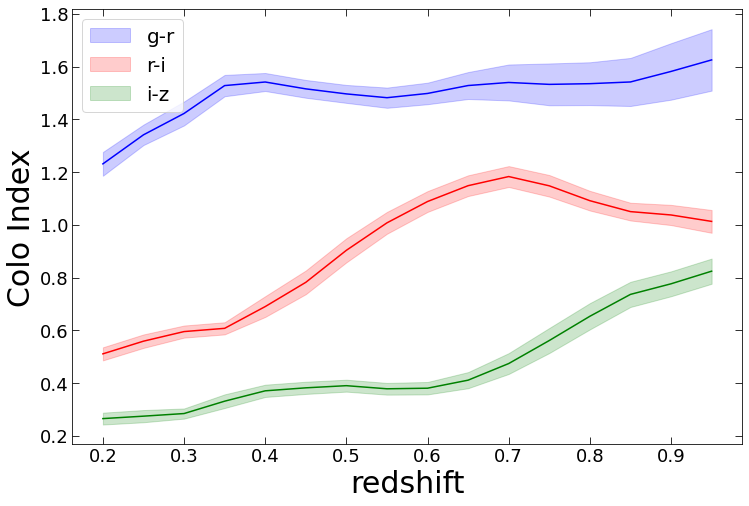

In [25]:
grouped_table = cl_members2.group_by('redshift')
median = grouped_table['g_r','r_i','i_z','redshift'].groups.aggregate(np.median)
err = grouped_table['g_r','r_i','i_z','redshift'].groups.aggregate(np.std)

plt.figure(figsize=(12,8))
X_m = median['redshift']
Yg = median['g_r']
Yr = median['r_i']
Yi = median['i_z']
plt.plot(X_m,Yg, c='blue')
plt.fill_between(X_m,Yg+err['g_r'],Yg-err['g_r'], color='blue', alpha=0.2, label='g-r')
plt.plot(X_m,Yr, c='red')
plt.fill_between(X_m,Yr+err['r_i'],Yr-err['r_i'], color='red', alpha=0.2, label='r-i')
plt.plot(X_m,Yi, c='green')
plt.fill_between(X_m,Yi+err['i_z'],Yi-err['i_z'], color='green', alpha=0.2, label='i-z')
plt.xlabel('redshift')
plt.ylabel('Colo Index')
plt.legend()
plt.show()

The line shows the median of the colour of the redMaPPer member galaxies while the band shows $68\%$ interval at a given redshift. The colour of the redMaPPer member galaxy is another approach that we intend to explore to select the galaxy members of a cluster by using it as red-sequence template. The redMaPPer algorithm uses the magnitude of the galaxies as the standard red-sequence template to select galaxy cluster members. 